### Importing required libraries

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Loading the dataset

In [2]:
df = pd.read_csv('User_Data.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
89,15682268,Male,35,50000,0
182,15694288,Female,32,117000,1
211,15735878,Male,52,150000,1
18,15704583,Male,46,28000,1
172,15794661,Female,26,118000,0


In [6]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
df.dtypes

,0
User ID,int64
Gender,object
Age,int64
EstimatedSalary,int64
Purchased,int64


### Droping User Id Column

In [9]:
df.drop('User ID',axis=1,inplace=True)

In [10]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Renaming the column

In [11]:
df.rename(columns={'EstimatedSalary':'Salary'},inplace=True)

In [12]:
df.head()

,Gender,Age,Salary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Handling Categorical variable

In [15]:
df['Gender'].head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male


In [18]:
gender = pd.get_dummies(df['Gender'],drop_first=True) # one hot encoding

In [19]:
gender.head()

,Male
0,True
1,True
2,False
3,False
4,True


### Merging the Dataset

In [22]:
df = df.join(gender)

In [23]:
df.head()

,Gender,Age,Salary,Purchased,Male
0,Male,19,19000,0,True
1,Male,35,20000,0,True
2,Female,26,43000,0,False
3,Female,27,57000,0,False
4,Male,19,76000,0,True


### Drop the gender categorical Column

In [24]:
df.drop('Gender',axis=1,inplace=True)

In [25]:
df.rename(columns={'Male':'Gender'},inplace=True)
df.head()

,Age,Salary,Purchased,Gender
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True


### Reordering the Columns

In [26]:
new_order = ['Gender','Age','Salary','Purchased']
df = df[new_order]
df

,Gender,Age,Salary,Purchased
0,True,19,19000,0
1,True,35,20000,0
2,False,26,43000,0
3,False,27,57000,0
4,True,19,76000,0
...,...,...,...,...
395,False,46,41000,1
396,True,51,23000,1
397,False,50,20000,1
398,True,36,33000,0


### Dependent and Independent variable

In [27]:
# independent variables x=df[['Gender','Age','Salary']]
# dependetn variables  y=df[['Purchased']]

x = df.iloc[:,0:3].values # independent variables
y = df.iloc[:,3].values # dependent variable or the output

In [28]:
x.shape

(400, 3)

In [29]:
y.shape

(400,)

In [30]:
df.describe()

,Age,Salary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Splitting the Dataset

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=2)

In [32]:
x_train.shape

(300, 3)

In [33]:
x_test.shape

(100, 3)

In [34]:
y_train.shape

(300,)

In [35]:
y_test.shape

(100,)

### Scalling Dataset

In [36]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.fit_transform(x_test)

In [37]:
x_train.shape

(300, 3)

In [38]:
x_train

array([[ 1.040833  ,  0.03172569,  0.06201266],
       [ 1.040833  , -0.06539376, -0.50084108],
       [ 1.040833  , -0.64811043, -1.50805304],
       [-0.96076892,  0.03172569,  0.32862759],
       [-0.96076892,  0.32308402,  0.09163654],
       [ 1.040833  , -0.45387154, -1.12294258],
       [ 1.040833  , -0.74522987, -1.53767692],
       [-0.96076892, -0.25963265, -0.64896049],
       [ 1.040833  , -1.13370765,  0.50637087],
       [ 1.040833  , -0.06539376,  2.22455597],
       [ 1.040833  ,  0.03172569,  0.06201266],
       [ 1.040833  , -1.13370765, -1.5673008 ],
       [ 1.040833  ,  1.10003958,  0.56561863],
       [ 1.040833  , -0.25963265, -1.24143811],
       [-0.96076892,  1.39139791, -0.91557542],
       [-0.96076892, -1.42506599, -1.21181423],
       [-0.96076892, -0.93946876, -0.9451993 ],
       [-0.96076892,  1.97411458, -0.64896049],
       [-0.96076892,  0.90580069, -0.56008884],
       [-0.96076892, -1.13370765,  0.32862759],
       [ 1.040833  ,  0.03172569, -0.234

In [39]:
print(x_train)

[[ 1.040833    0.03172569  0.06201266]
 [ 1.040833   -0.06539376 -0.50084108]
 [ 1.040833   -0.64811043 -1.50805304]
 [-0.96076892  0.03172569  0.32862759]
 [-0.96076892  0.32308402  0.09163654]
 [ 1.040833   -0.45387154 -1.12294258]
 [ 1.040833   -0.74522987 -1.53767692]
 [-0.96076892 -0.25963265 -0.64896049]
 [ 1.040833   -1.13370765  0.50637087]
 [ 1.040833   -0.06539376  2.22455597]
 [ 1.040833    0.03172569  0.06201266]
 [ 1.040833   -1.13370765 -1.5673008 ]
 [ 1.040833    1.10003958  0.56561863]
 [ 1.040833   -0.25963265 -1.24143811]
 [-0.96076892  1.39139791 -0.91557542]
 [-0.96076892 -1.42506599 -1.21181423]
 [-0.96076892 -0.93946876 -0.9451993 ]
 [-0.96076892  1.97411458 -0.64896049]
 [-0.96076892  0.90580069 -0.56008884]
 [-0.96076892 -1.13370765  0.32862759]
 [ 1.040833    0.03172569 -0.23422615]
 [-0.96076892  0.80868124 -1.38955751]
 [-0.96076892 -0.25963265 -0.35272168]
 [-0.96076892  0.90580069  1.30621566]
 [-0.96076892  0.32308402 -0.17497839]
 [ 1.040833   -0.25963265

### Fitting Decission Tree to the training set

In [40]:
#Fitting Decision Tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier
# Create a DecisionTreeClassifier object with the following parameters:
# - criterion: It defines the function to measure the quality of a split.
#   Here, 'entropy' is used, which measures the information gain based on entropy.
# - splitter: It specifies the strategy used to choose the split at each node.
#   'best' means the best split is chosen based on the criterion specified.
# - max_depth: It limits the maximum depth of the tree.
#   This parameter helps control overfitting. Here, the maximum depth is set to 10.
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10, random_state=0)

model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

### Performance of the model on Training Dataset

In [41]:
y_pred_train = model.predict(x_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [42]:
y_pred_train.shape

(300,)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
cm_train = confusion_matrix(y_train, y_pred_train)
print("Confussion matrics Result:\n",cm_train)

Confussion matrics Result:
 [[195   0]
 [  2 103]]


### Classification Report Train Data

In [44]:
print("\nClassification Report:")
print(classification_report(y_pred_train, y_pred_train))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       103

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



### Prediction on Test Data

In [45]:
y_pred_test = model.predict(x_test)
y_pred_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

### Performance of the model on Test Dataset

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
cm_test = confusion_matrix(y_test, y_pred_test)
print("Confussion matrics Result:\n",cm_test)

Confussion matrics Result:
 [[55  7]
 [11 27]]


### Classification Report Test Data

In [47]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        62
           1       0.79      0.71      0.75        38

    accuracy                           0.82       100
   macro avg       0.81      0.80      0.80       100
weighted avg       0.82      0.82      0.82       100



<Axes: >

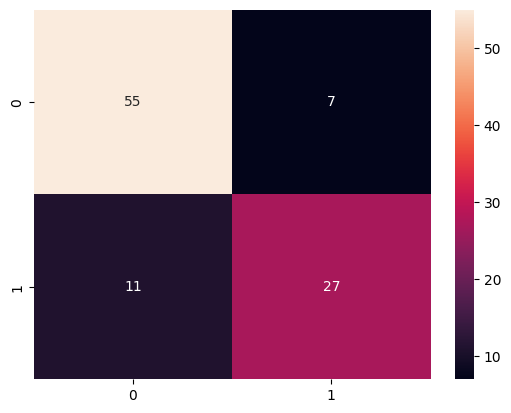

In [48]:
import matplotlib.pyplot as plt # there is some thing to plot
%matplotlib inline
import seaborn as sns #  EDA

sns.heatmap(cm_test,annot=True)

## Generating the tree

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

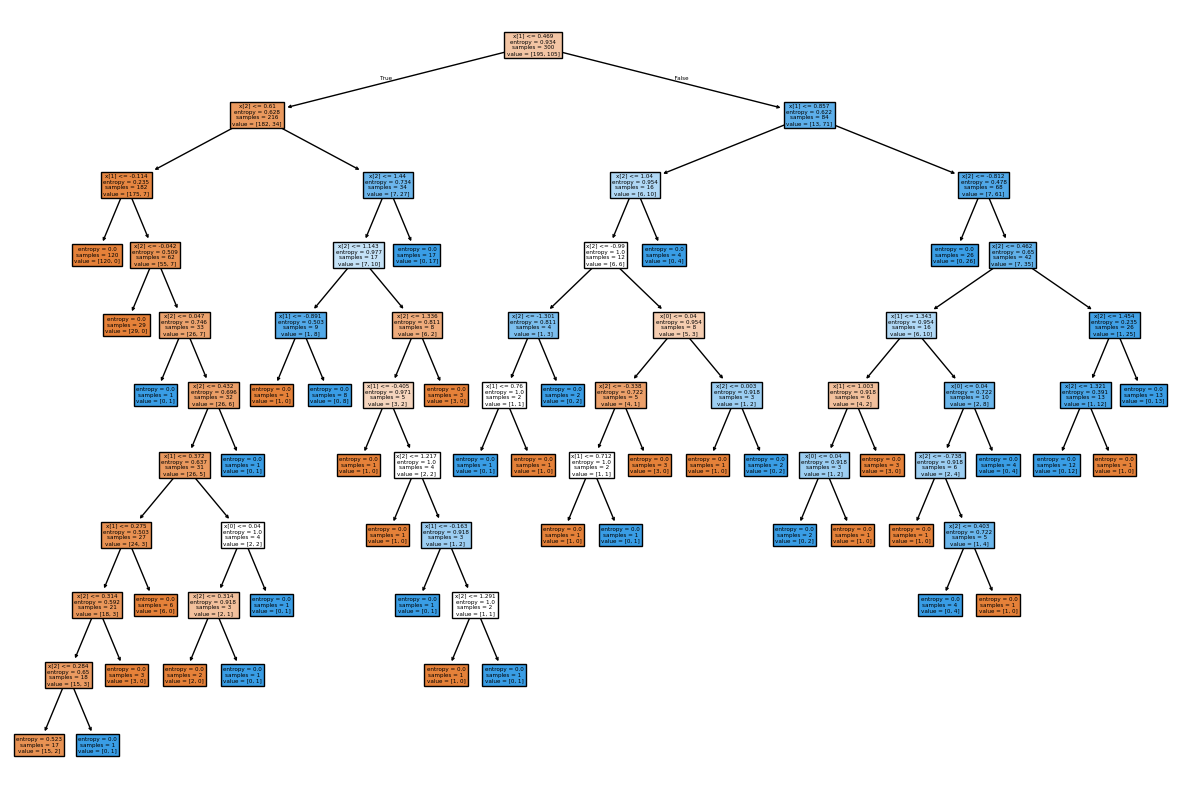

In [49]:
## Generating a tree
# Importing the tree module from the scikit-learn library
from sklearn import tree
# Importing the pyplot module from the matplotlib library
import matplotlib.pyplot as plt
# Setting the size of the figure to (15, 10), in inches
plt.figure(figsize=(15,10))
# Plotting the decision tree stored in the 'model' object, with filled nodes
tree.plot_tree(model, filled=True)
model